# Code stuff - not slides!

In [11]:
%run ../ML_plots.ipynb

ERROR:root:File `'../ML_plots.ipynb.py'` not found.


# Session 13:
## Supervised learning, part 2

*Andreas Bjerre-Nielsen*

## Agenda
1. [model building](#Model-building) 
1. [model selection](#Model-selection) 
  - [cross validation](#Cross-validation)
  - [tools for selection](#Tools-for-model-selection)
1. [dimensionality reduction](#Dimensionality-reduction)  
1. [measures for classification](#Measures-for-classification)  


## Vaaaamos

In [12]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns

plt.style.use('default') # set style (colors, background, size, gridlines etc.)
plt.rcParams['figure.figsize'] = 10, 4 # set default size of plots
plt.rcParams.update({'font.size': 18})

## Supervised problems (1)
*What is the tradeoff for making supervised regression models?*

In [13]:
# f_bias_var['regression'][2]

## Supervised problems (2)
*What was a remedy to overfitting in linear models? How do we measure overfitting?*

Regularization
- Too many irrelevant features - solved by L1 regularization ~ lasso
- Exploding coefficients - solved by L2 regularization ~ ridge

# Model building 

## Model pipelines (1)
*Is there a smart way to build ML models?*

Yes, we build a pipeline:

- Preprocessing data
    - Standard: adding polynomials, imputation, rescaling
    - Unsupervised learning (more info..)
- Supervised learning

## Model pipelines (2)


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_01.png' alt="Drawing" style="width: 900px;"/></center>


## Model pipelines (3)
*What are the advantages of using a pipeline?*

- Ensures good practice - we only fit on training data. 
- Much less code!

## Applying a model pipeline (1)
*What would this look like in Python?*

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler())

print(pipe_preproc.steps[0])
print(pipe_preproc.steps[1])

('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False))
('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True))


## Applying a model pipeline (2)
*Let's some load Boston house price data*

In [15]:
print('\n'.join(load_boston()['DESCR'].split('\n')[13:28]))

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's


## Applying a model pipeline (3)
*And how do I apply the pipe on the data?*

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
X = load_boston().data
y = load_boston().target

print(load_boston().feature_names)

# splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y)

# apply preproc - fit on train
pipe_preproc.fit(X_train) # fit to training
X_train_prep = pipe_preproc.transform(X_train) # transform training data
X_test_prep = pipe_preproc.transform(X_test) # transform test data

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Applying a model pipeline (4)
*And how do I apply the pipe on the data?*

In [17]:
# THE PIPE APPLIED

# apply preproc - fit on train
pipe_preproc = make_pipeline(PolynomialFeatures(), 
                             StandardScaler())

pipe_preproc.fit(X_train) # fit to training
X_train_prep = pipe_preproc.transform(X_train) # transform training data
X_test_prep = pipe_preproc.transform(X_test) # transform test data

# WITHOUT PIPE 
poly_trans = PolynomialFeatures()
scaler = StandardScaler()

X_train_poly = poly_trans.fit_transform(X_train) 
X_test_poly = poly_trans.fit_transform(X_test)

scaler.fit(X_train_poly)
X_train_prep_alt = scaler.transform(X_train_poly)
X_test_prep_alt = scaler.transform(X_test_poly)




# Model selection 


## Measuring the problem
*Does machine learning work out of the box?*

- In some cases ML works quite well out of the box.
- Often ML requires making careful choices.
    - Note that automated machine learning packages and services exist.

*Which choices are to be made?*

- We need to pick model building **hyperparameters**.
- E.g. $\lambda$ for Lasso, Ridge.

## Model validation (1)
*How do we measure our model's performance for different hyperparameters?*

- Remember we cannot use the test set.

*Could we somehow mimick what we do with test data?*

- Yes, we can split the remaining non-test data into training and validation data:
    - we train model for various hyperparameters on training data;
    - pick the hyperparameters which performs best on validation data.

## Model validation (2)
*The non-test data is split into training and validation*


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_02.png' alt="Drawing" style="width: 950px;"/></center>


## Model validation (3)
*What would this look like in Python?*

In [18]:
# splitting into development (2/3) and test data (1/3)
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=1/3, random_state=1)

# splitting development into train (1/3) and validation (1/3)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size=1/2, random_state=1)
print(type(X_train))
print(X[0:3])
print(X_dev[0:3])

<class 'numpy.ndarray'>
[[6.3200e-03 1.8000e+01 2.3100e+00 0.0000e+00 5.3800e-01 6.5750e+00
  6.5200e+01 4.0900e+00 1.0000e+00 2.9600e+02 1.5300e+01 3.9690e+02
  4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]]
[[3.65900e-02 2.50000e+01 4.86000e+00 0.00000e+00 4.26000e-01 6.30200e+00
  3.22000e+01 5.40070e+00 4.00000e+00 2.81000e+02 1.90000e+01 3.96900e+02
  6.72000e+00]
 [5.82115e+00 0.00000e+00 1.81000e+01 0.00000e+00 7.13000e-01 6.51300e+00
  8.99000e+01 2.80160e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.93820e+02
  1.02900e+01]
 [2.51990e-01 0.00000e+00 1.05900e+01 0.00000e+00 4.89000e-01 5.78300e+00
  7.27000e+01 4.35490e+00 4.00000e+00 2.77000e+02 1.86000e+01 3.89430e+02
  1.80600e+01]]


## Model validation (4)
Let's train a linear regression model

In [19]:
from sklearn.linear_model import Lasso, LinearRegression
pipe_lr = make_pipeline(PolynomialFeatures(include_bias=False), 
                        StandardScaler(),
                        LinearRegression())

pipe_lr.fit(X_dev, y_dev)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

## Model validation (5)
Let's find the  Lasso model which performs best in the validation set

In [20]:
from sklearn.metrics import mean_squared_error as mse

perform = []
lambdas = np.logspace(-4, 4, 33)
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                               StandardScaler(),
                               Lasso(alpha=lambda_, random_state=1))
    pipe_lasso.fit(X_train, y_train)
    y_pred = pipe_lasso.predict(X_val)
    perform.append(mse(y_pred, y_val))
    
hyperparam_perform = pd.Series(perform,index=lambdas)

optimal = hyperparam_perform.nsmallest(1)    
print(optimal)
print(X_train)

0.01    17.318434
dtype: float64
[[6.96215e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.94430e+02
  1.71100e+01]
 [3.51000e-02 9.50000e+01 2.68000e+00 ... 1.47000e+01 3.92780e+02
  3.81000e+00]
 [4.81213e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 2.55230e+02
  1.64200e+01]
 ...
 [1.36781e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 6.89500e+01
  3.40200e+01]
 [9.26600e-02 3.40000e+01 6.09000e+00 ... 1.61000e+01 3.83610e+02
  8.67000e+00]
 [5.66000e-02 0.00000e+00 3.41000e+00 ... 1.78000e+01 3.96900e+02
  5.50000e+00]]


## Model validation (6)
Let's compare the performance of the Lasso vs. Linear Regression

In [21]:
pipe_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                           StandardScaler(),
                           Lasso(alpha=optimal.index[0]))

pipe_lasso.fit(X_dev,y_dev)
print('Lasso', round(mse(pipe_lasso.predict(X_test),y_test), 3))
print('LinReg', round(mse(pipe_lr.predict(X_test),y_test), 3))
print(pipe_lasso.predict(X_test))

Lasso 12.382
LinReg 17.895
[30.85494939 25.48148374 20.13639253 19.48003787 25.16739645 20.00373669
 31.75293158 15.67244458 20.02722032 25.50852795 28.94506726 28.96511249
 19.28219441 20.06934701 20.78625732 25.45211038 13.67602544 48.37150506
 23.56235583 13.68796657 18.52882808 16.16630787 23.56081715 24.87983383
 27.05811836  9.11182121 15.22536355 19.14758126 38.34980064 15.540185
 23.70553396 14.66218885 51.11732942 14.61169934 20.89262558 21.50263993
 15.23612886 31.57867604 18.11702712 16.66960411 23.71858722 23.1756614
 27.28941304 13.8059198  16.56454301 12.9940562  47.52880065 17.11774006
 23.21899043 17.62555599 27.35308016 21.76480444 25.88503694 24.46427631
 10.06591247 22.44874067 12.22737961 26.37152911 16.05052445 43.60084793
 17.37993927 27.37954825 16.58335534 18.4554717  24.00343142 33.9857969
 45.16223553 23.04783888 22.52718014 22.16562654 23.79521758  9.25341915
 24.31561588 19.20487691 19.46764988 22.91818472 52.57230095 25.34223004
 28.98262085 36.98657755 18.

## Bias and variance (1)
*How do we describe the modelling error?*

From [Wikipedia Sunday, August 19, 2018](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff):

- model **bias**: _an error from erroneous assumptions in the learning algorithm_
  - oversimplification of models, cannot approximate all patterns found
  

- model **variance**: _an error from sensitivity to small fluctuations in the training set_
  - reacts too much to sample errors and thus finds too many spurious relations 

## Bias and variance (2)

- **over fitting**: low bias / high variance
    - traning our model captures all patterns but we also find some irrelevant
    - examples: Decision Trees, Support Vector Machines or Neural Networks
- **under fitting**: high bias / low variance
    - traning our model captures all patterns but we also find some irrelevant
    - examples: linear and logistic regression (without polynomial expansion)

## Bias and variance (3)
*Not so fast.. OLS is unbiased, right?*

 Yes, OLS is unbiased. But .. 
- Requires we know the true form of the model. 

*What happens if we introduce regularization?*
- Then model is no longer unbiased.

## Smarter validation
*Is this approach the smartest way for deciding on choice of hyperparameters?*

# NO


Our model choice depends a lot on which sample we pick. Could we use more of the data?

# Cross validation


## The holdout method
*How do we got the more out of the data?*

We reuse the data in the development set repeatedly
- We test on all the data
- Rotate which parts of data is used for test and train.

## Leave-one-out CV
*How do we got the most of the data?*

The most robust approach
- Each single observation in the training data we use the remaining data to train.
- Makes number of models equal to the number of observations
- Very computing intensive - does not scale!
LOOCV

## K fold method (1)
*How do balance computing time vs. overfitting?*

We split the sample into $K$ even sized test bins.
- For each test bin $k$ we use the remaining data for training.

Advantages:
- We use all our data for testing.
- Training is done with 100-(100/K) pct. of the data, i.e. 90 pct. for K=10.

## K fold method (2)
In K-fold cross validation we average the errors.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_03.png' alt="Drawing" style="width: 1100px;"/></center>

## K fold method (3)
*How would we use K-fold cross validation to select our model?*

In [61]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=10)
mseCV = []

for lambda_ in lambdas:
    
    pipe_lassoCV = make_pipeline(PolynomialFeatures(degree=3, include_bias=False),
                                 StandardScaler(),
                                 Lasso(alpha=lambda_, random_state=1))    
    mseCV_ = []
    
    for train_idx, val_idx in kfolds.split(X_dev, y_dev):
        
        X_train, y_train, = X_dev[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev[val_idx], y_dev[val_idx] 

        pipe_lassoCV.fit(X_train, y_train)
        
        mseCV_.append(mse(pipe_lassoCV.predict(X_val), y_val))    
    mseCV.append(mseCV_)

## K fold method (4)

In [70]:


optimalCV = pd.DataFrame(mseCV, index=lambdas).mean(axis=1).nsmallest(1)

pipe_lassoCV = make_pipeline(PolynomialFeatures(include_bias=False), 
                                StandardScaler(),
                                Lasso(alpha=optimalCV.index[0], random_state=1))

pipe_lassoCV.fit(X_dev,y_dev)

model_pipes = ('Lasso', pipe_lasso), ('Lasso CV', pipe_lassoCV),('LinReg', pipe_lr)

for model_name, model_pipe in model_pipes:
    score = mse(model_pipe.predict(X_test),y_test)
    print(model_name, round(score, 1))

Lasso 12.4
Lasso CV 12.4
LinReg 17.9


## Learning curves (1)
*What does a balanced model look like?*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_04.png' alt="Drawing" style="width: 600px;"/></center>

## Learning curves (2)

In [74]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = \
    learning_curve(estimator=pipe_lasso,
                   X=X_train,
                   y=y_train,
                   train_sizes=np.linspace(0.1, 1.0, 10),
                   scoring='neg_mean_squared_error',                 
                   cv=3)
    
mse_ = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                     'Test':-test_scores.mean(axis=1)})\
        .set_index(pd.Index(train_sizes,name='sample size'))    
print(mse_.head())

                   Test     Train
sample size                      
20           327.856169  0.040538
40            67.607438  0.836417
60            52.208482  1.592246
80            50.194690  1.911472
101           36.249970  3.419180


## Learning curves (3)

Text(0,0.5,'Mean squared error')

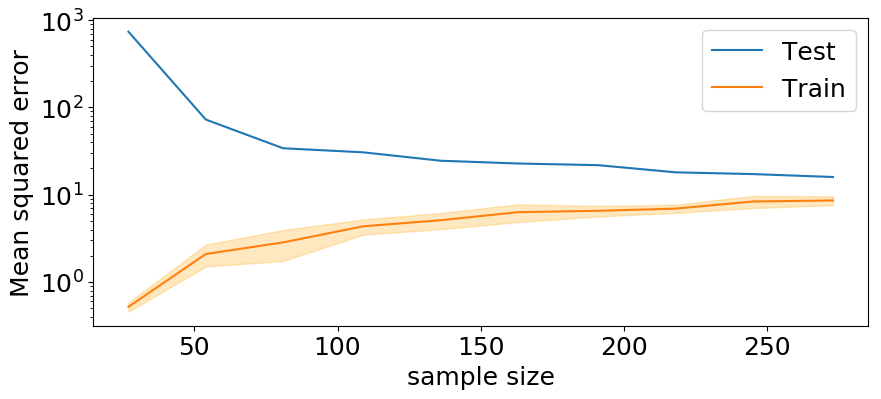

In [38]:
f_learn, ax = plt.subplots(figsize=(10,4))
mse_.plot(ax=ax, logy=True)
ax.fill_between(train_sizes,
                -train_scores.mean(1) + train_scores.std(1)*1.96,
                -train_scores.mean(1) - train_scores.std(1)*1.96, 
                alpha=0.25, 
                color='orange')
ax.set_ylabel('Mean squared error')

# Tools for model selection

## Validation curves (1)

In [78]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = \
    validation_curve(estimator=pipe_lasso,
                     X=X_train,
                     y=y_train,
                     param_name='lasso__alpha',
                     param_range=lambdas,
                     scoring='neg_mean_squared_error',                 
                     cv=3)

mse_score = pd.DataFrame({'Train':-train_scores.mean(axis=1),
                          'Validation':-test_scores.mean(axis=1),
                          'lambda':lambdas})\
              .set_index('lambda')   
print(mse_score.Test.nsmallest(1))

AttributeError: 'DataFrame' object has no attribute 'Test'

## Validation curves (2)

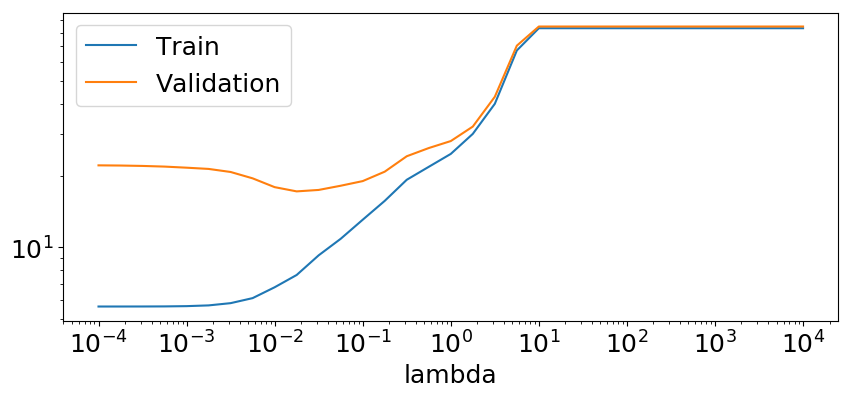

In [79]:
mse_score.plot(logx=True, logy=True)

## Grid search (1)
*How do we search for two or more optimal parameters?*

- Goal: find the optimal parameter combination: $$\lambda_1^*,\lambda_2^*=\arg\min_{\lambda_1,\lambda_2}MSE^{CV}(X_{train},y_{train})$$

- Option 1: We can loop over the joint grid of parameters.
  - One level for each parameter.
  - Caveats:

- Option 2: sklearn has `GridSearchCV` has a tool which tests all parameter combinations.

## Grid search (2)
*How does this look in Python?*

In [77]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(estimator=pipe_lasso, 
                  param_grid={'lasso__alpha':lambdas}, 
                  scoring='neg_mean_squared_error', 
                  cv=10)

gs = gs.fit(X_train, y_train)
gs.best_params_

{'lasso__alpha': 0.01}

- Notation: double underscore between estimator and hyperparameter, e.g. 'est__hyperparam' 
- Scoring: negative MSE as we're maximizing the score ~ minimize MSE.

## Grid search (3)
*What if we have 10,000 parameter combinations?*

- Option 1: you buy a cluster on Amazon, learn how to parallelize across computers. Intro in last lecture.

- Option 2: you drop some of the parameter values

- Option 3: `RandomizedSearchCV` searches a subset of the combinations.

## Enhancing cross validation (1)

- Model validation does not consider that we are also tuning hyperparameters:
  - Leads too overfitting (Varma & Simon 2006; Cawley, Talbot 2010).
- Solution is **nested cross validation**.
  - Validation step should not be modelled as 1) train; 2) test.
  - Better way is 1) model selection: train, validate; 2) test.
  - Implement as pp 204-205 in Python for Machine Learning:
      - first inner loop: `GridSearchCV` 
      - second outer loop: `cross_val_score`

## Enhancing cross validation (1)
*Cross-val. suffers from the fact that it models test-train*

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_07.png' alt="Drawing" style="width: 700px;"/></center>

# Dimensionality reduction

## Principal components analysis (1)
*How can we reducing the number of features?* 

One solution is finding the **principal components**. 
- essence: we get **fewer features** of **greater importance**.
- the new features are:
    - *uncorrelated* (i.e. linearly independent, orthogonal)
    - ordered so decreasing in how much variation of the feature data they explain

The method is called **principal components analysis**
  - corresponds to eigen decomposition of matrix into
      - principal eigenvectors (factors)
      - principal eigenvalues (factor importance)

## Principal components analysis (2)

Finding principal components for two features. Notice:
- The factors are orthogonal
- The first factor explains more variation, |PC1| > |PC2|

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch05/images/05_01.png' alt="Drawing" style="width: 600px;"/></center>

## Principal components analysis (3)

We can plot the explained variation against the component indices, often called scree plot.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch05/images/05_02.png' alt="Drawing" style="width: 700px;"/></center>

## Principal components analysis (4)
*How do we choose the number of components?*


- Standard is to look for an *elbow* in the previous scree plot.

*What might go wrong about this approach??*

- The number of feautures should be a hyperparameter in the model building!!!

## Principal components analysis  (5)
*How does this look in Python?*

In [22]:
from sklearn.decomposition import PCA

pipe_pca_lasso = make_pipeline(PolynomialFeatures(include_bias=False), 
                               StandardScaler(),
                               PCA(),
                               Lasso())


gs = GridSearchCV(estimator=pipe_pca_lasso, 
                  param_grid={'lasso__alpha':lambdas, 
                              'pca__n_components':range(1, X_train.shape[1]+1)},
                  scoring='neg_mean_squared_error', 
                  cv=10)

gs = gs.fit(X_train, y_train)
gs.best_params_

{'lasso__alpha': 0.1778279410038923, 'pca__n_components': 13}

# Measures for classification

## Breakdown by error type (1)

We measure the accaracy as the rate of true predictions, i.e. $$ACC=\frac{TP+TN}{TP+TN+FP+FN}=\frac{True}{True+False}$$

where our measures are

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_08.png' alt="Drawing" style="width: 400px;"/></center>

## Breakdown by error type (2)

Some powerful measures:

- Precision: share of predicted positive that are true
    - PRE = $\frac{TP}{TP+FP}$    
- Recall: share of actual positive that are true    
   - REC = $\frac{TP}{TP+FN}=\frac{TP}{AP}$   
- F1: mix recall and precision: $\frac{2\cdot PRE\cdot REC}{PRE+ REC}$


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

## Breakdown by error type (3)

Classification models provide a predicted likelihood of being in the class or not:
- Receiver Operating Characteristic (ROC) curve by varying thresholds for predicted true.
    - ROC is a *theoretical* measure of model performance based on probabilities.
    - AUC: Area Under the (ROC) Curve.

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch06/images/06_10.png' alt="Drawing" style="width: 800px;"/></center>

# The end
[Return to agenda](#Agenda)